Importer la bibliothèque

In [2]:
import pandas as pd

Trouver le fichier à charger

In [4]:
cd .

/home/emilien/Dropbox/Python pour les SHS/Formations/2021-10 URFIST Lyon/Module 3 - Pandas et tableaux 1h30


In [9]:
data = pd.read_excel("./Data/Corpus.xlsx")

In [10]:
type(data)

pandas.core.frame.DataFrame

In [12]:
data.shape

(206, 10)

In [ ]:
data = data.drop(["Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9"],axis=1)

In [22]:
data.columns

Index(['Date_reco', 'Date', 'Titre', 'Journal', 'Contenu', 'Auteur'], dtype='object')

In [30]:
data.loc[10:20,"Contenu"]

10      Au Sénégal, où il est né, il n'est pas «le c...
11      Neuf mois après le début de la pandémie de C...
12      LAISSONS LES MÉDECINS PRESCRIRE DÉFENDRE LA ...
13      Efficacité des corticoïdes, mais seulement d...
14      Sorti le 11 novembre, le film documentaire f...
15      Marseille correspondant - C'est la fin de la...
16                                           Marseille 
17      «I l n'y a pas de solution magique, seulemen...
18      Le 22 octobre, l'Agence du médicament s'est ...
19      Je vais vous raconter une chose que je n'ai ...
20      L'   équivalent d'un 11 Septembre, voire de ...
Name: Contenu, dtype: object

In [33]:
data["Contenu"]

0        Le 16 janvier, pour sauver son père de l'asp...
1        Le Covid-19 a révélé l'extraordinaire potent...
2        Le traitement médiatique de l'épidémie de Co...
3        Par Nicolas Berrod, Ludwig Gallet et Paméla ...
4        Deux personnes masquées, avec des logos de l...
                             ...                        
201      Depuis 2011 et l'ouverture de la plateforme ...
202      Par Marcelo Wesfreid   C'était il y a pile u...
203      Infectiologue de renom, mais guère connu du ...
204      Elsa Mari et Florence Méréo   L'innovation  ...
205       CONTINUER à injecter le vaccin AstraZeneca ...
Name: Contenu, Length: 206, dtype: object

Filtrer le tableau

In [40]:
filtre = data["Journal"].str.contains("Le Monde")
len(data[filtre])

47

In [41]:
data["Journal"].unique()

array([' Le Figaro, no. 23910   ', ' Le Monde   ', " l'Humanité   ",
       " Aujourd'hui en France  Edition Principale ", ' Libération   ',
       ' La Tribune (France), no. 7213   ',
       ' La Tribune (France), no. 7013   ',
       ' La Tribune (France), no. 7033   ', ' La Croix, no. 41844   ',
       ' Les Echos, no. 23468   ', ' Les Echos, no. 23326   ',
       ' Le Figaro, no. 23710   ', ' Le Figaro, no. 23714   ',
       ' La Tribune (France), no. 7046   ',
       ' La Correspondance économique   ', ' Le Figaro, no. 23692   ',
       ' La Tribune (France), no. 7192   ', ' Les Echos, no. 23356   ',
       ' La Croix, no. 42039   ', ' Le Figaro, no. 23694   ',
       ' Les Echos, no. 23551   ', ' La Croix, no. 42012   ',
       ' Le Figaro, no. 23780   ', ' La Tribune (France), no. 7004   ',
       ' Le Figaro, no. 23680   ', ' Le Figaro, no. 23693   ',
       ' Le Figaro, no. 23746   ', ' Le Figaro, no. 23744   ',
       ' La Tribune (France), no. 7044   ', ' Le Figaro, no. 2371

In [42]:
data["Journal"].value_counts()

 Le Monde                                      47
 Libération                                    39
 Aujourd'hui en France  Edition Principale     34
 l'Humanité                                    14
 La Croix, no. 41920                            3
                                               ..
 La Croix, no. 41889                            1
 Les Echos, no. 23299                           1
 La Croix, no. 41866                            1
 La Croix, no. 41859                            1
 Le Figaro, no. 23837                           1
Name: Journal, Length: 67, dtype: int64

In [48]:
filtre = data["Date_reco"]>"2021-06-01"
ss_corpus = data[filtre]
len(ss_corpus)

50

Créer une colonne

In [49]:
data["Test"] = 1

In [53]:
data["presence_Raoult"] = data["Contenu"].str.contains("Raoult")

Compter nombre de lettes

In [56]:
data["nb_lettres"] = data["Contenu"].apply(len)

Compter le nombre de mots :

- définir une fonction qui compte pour 1 texte
- l'appliquer à l'ensemble du tableau

In [65]:
# fonction
def nbre_mots(texte):
    texte = texte.replace(","," ").replace("'"," ")
    return len(texte.split(" "))

In [60]:
nbre_mots("Test de la fonction")

4

In [67]:
data["nbre_mots"] = data["Contenu"].apply(nbre_mots)

In [71]:
data["nbre_mots"].mean()

1083.6796116504854

In [72]:
data["nb_lettres"].median()

5096.0

In [86]:
#Recoder le journal

def reco_journal(texte):
    if "La Croix" in texte:
        return "La Croix"
    if "Le Figaro" in texte:
        return "Le Figaro"
    if "Le Monde" in texte:
        return "Le Monde"
    if "Humanité" in texte:
        return "L'Humanité"
    if "Aujourd'hui en France":
        return "Aujourd'hui en France"
    return texte
    
data["Journal_reco"] = data["Journal"].apply(reco_journal).value_counts()

Le Figaro    37
La Croix     13
Name: Journal, dtype: int64

Exercice : calculer le nombre moyen de mots par journal

In [91]:
filtre = data["Journal_reco"]=="Le Monde"
data[filtre]["nbre_mots"].mean()

1484.276595744681

In [93]:
filtre = data["Journal_reco"]=="La Croix"
data[filtre]["nbre_mots"].mean()

630.5384615384615

In [95]:
filtre = data["Journal_reco"]=="Le Monde"
data[filtre]["nbre_mots"].mean()

1484.276595744681

In [96]:
data["Journal_reco"].unique()

array(['Le Figaro', 'Le Monde', "L'Humanité", "Aujourd'hui en France",
       'La Croix'], dtype=object)

In [94]:
for j in data["Journal_reco"].unique():
    filtre = data["Journal_reco"]==j
    print(j,data[filtre]["nbre_mots"].mean())

Le Figaro 1069.8648648648648
Le Monde 1484.276595744681
L'Humanité 893.3571428571429
Aujourd'hui en France 980.9263157894737
La Croix 630.5384615384615


In [98]:
data.groupby("Journal_reco")["nbre_mots"].agg(["mean","median","std"])

,mean,median,std
Journal_reco,,,
Aujourd'hui en France,980.926316,862.0,710.044264
L'Humanité,893.357143,711.0,763.929881
La Croix,630.538462,512.0,445.085500
Le Figaro,1069.864865,1067.0,508.463435
Le Monde,1484.276596,1262.0,883.085813


Faire un tableau croisé

In [111]:
pd.crosstab(data["Journal_reco"],data["presence_Raoult"]).to_excel("nomdufichier.xls")

/tmp/ipykernel_71308/3489938647.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  pd.crosstab(data["Journal_reco"],data["presence_Raoult"]).to_excel("nomdufichier.xls")


Exploration visuelle

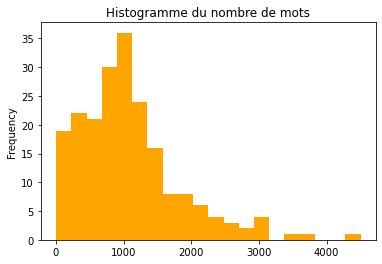

In [105]:
import matplotlib.pyplot as plt

data["nbre_mots"].plot(kind="hist",bins=20,color="orange",
                       title="Histogramme du nombre de mots")

plt.savefig("figure.png",dpi=200)

Faire des statistiques
- https://pingouin-stats.org/
- pyshs

In [114]:
import pyshs

In [117]:
pyshs.tri_a_plat(data,"Journal_reco")

,Effectif,Pourcentage (%)
Aujourd'hui en France,95.0,46.1
L'Humanité,14.0,6.8
La Croix,13.0,6.3
Le Figaro,37.0,18.0
Le Monde,47.0,22.8
Total,206.0,100.0
